# Plots for Section 7

In [1]:
import sys
import sympy as sp
import matplotlib
import numpy
import scipy

print("Python version", sys.version)
print("Sympy version", sp.__version__)
print("Matplotlib version", matplotlib.__version__)
print("Numpy version", numpy.__version__)
print("Scipy version", scipy.__version__)

from datetime import date

print("Today:", date.today())

Python version 3.9.10 (main, Jan 15 2022, 11:48:00) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Sympy version 1.10.1
Matplotlib version 3.5.1
Numpy version 1.22.3
Scipy version 1.8.0
Today: 2022-04-07


In [2]:
%load_ext autoreload
%autoreload 2

# Specify the local path for the modules
import sys
import os.path as osp
sys.path.append(osp.join(osp.abspath(''), '..', 'lib'))

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 13})

## Directed acyclic graphs

In [4]:
lam_values = np.linspace(0, 1, 100)
MD_values = [1 - lam for lam in lam_values]
SD_values = [np.exp(lam + lam**2/2) * (1 - lam) for lam in lam_values]
D_values = [np.exp(lam) * (1 - lam) for lam in lam_values]

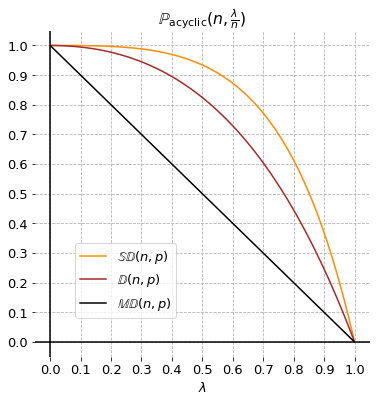

In [5]:
plt.figure(figsize=(6,6))
plt.box(on=False)
#plt.xlim(-3.1, 3.1)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, linestyle='--')
plt.xlabel(r"$\lambda$")
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.linspace(0, 1, 11))
plt.plot(lam_values, SD_values, color='darkorange', label=r"$\mathbb{SD}(n, p)$")
plt.plot(lam_values, D_values, color='brown', label=r"$\mathbb{D}(n, p)$")
plt.plot(lam_values, MD_values, color='black', label=r"$\mathbb{MD}(n, p)$")
plt.title(r"$\mathbb{P}_{\mathsf{acyclic}}(n, \frac{\lambda}{n})$")
plt.legend(loc='best', bbox_to_anchor=(0.1,0.1))
plt.savefig("proba_dag.pdf", bbox_inches='tight')

### Inside the critical window

The code from Section 5.x for scipy is reused here by means of a utility library `Airy.py`.

In [6]:
from Airy import complex_quad, AiryAi

> The following computation takes around 2 minutes

In [7]:
%%time
mu_values_dag = np.linspace(-3, 3, 100)
p_values_dag = [
    (
        2**(-1/3)            # coeff from varphi
        / (2 * np.pi * 1j)   # from Cauchy integral
        *
        complex_quad(
            lambda t:
            1
            / AiryAi(0, -2**(1/3) * t)[0]
            * np.exp(- mu * t - mu**3 / 6)
            ,
            -20j, 20j
        )[0]
    )    
    for mu in mu_values_dag
]

CPU times: user 2min 4s, sys: 1.37 s, total: 2min 5s
Wall time: 2min 15s


In [8]:
p_values_dag_refined = [p.real for p in p_values_dag]

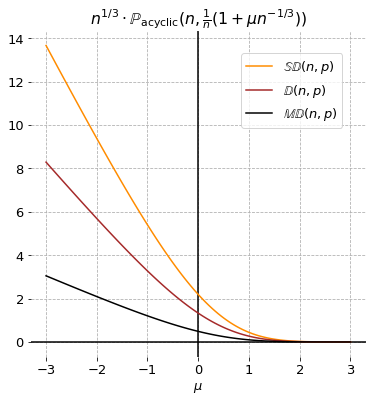

In [9]:
plt.figure(figsize=(6,6))
plt.box(on=False)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, linestyle='--')
plt.xlabel(r"$\mu$")
plt.xticks(np.linspace(-3, 3, 7))
plt.plot(
    mu_values_dag,
    [p * np.exp(1.5) for p in p_values_dag_refined],
    color='darkorange', label=r"$\mathbb{SD}(n, p)$"
)
plt.plot(
    mu_values_dag,
    [p * np.exp(1) for p in p_values_dag_refined],
    color='brown', label=r"$\mathbb{D}(n, p)$"
)
plt.plot(
    mu_values_dag,
    p_values_dag_refined,
    color='black', label=r"$\mathbb{MD}(n, p)$"
)
plt.title(r"$n^{1/3} \cdot \mathbb{P}_{\mathsf{acyclic}}(n, \frac{1}{n}(1 + \mu n^{-1/3}))$")
plt.legend(loc='best', bbox_to_anchor=(.95,.95))
plt.savefig("proba_dag_critical.pdf", bbox_inches='tight')